# 기본 환경 설정

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.precision', 6)
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
pd.options.mode.copy_on_write = True

In [108]:
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')

In [109]:
eng_scores = np.array(df['english'])[:10]
math_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':eng_scores,
                          'mathematics':math_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))


# 산점도


In [110]:
scores_df.describe()

,english,mathematics
count,10.000000,10.000000
mean,55.000000,71.400000
std,9.775252,8.720347
min,41.000000,60.000000
25%,48.250000,63.500000
50%,56.500000,71.000000
75%,63.250000,79.500000
max,69.000000,82.000000


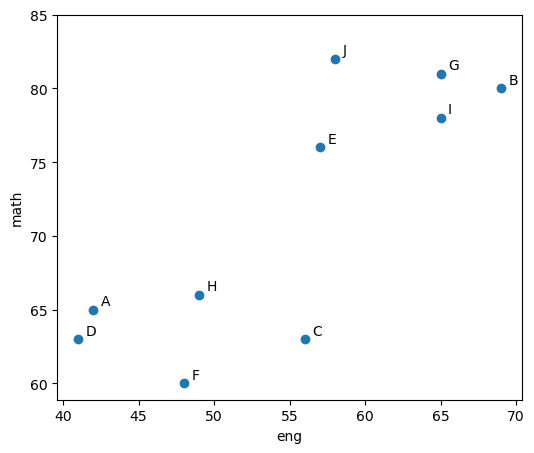

In [111]:
plt.rc('figure',figsize=(6,5))

plt.scatter(eng_scores,math_scores)
plt.xlabel('eng')
plt.ylabel('math')

plt.xticks(range(40,75,5))
plt.yticks(range(60,90,5))

name = list('ABCDEFGHIJ')
for i, name in enumerate(name):
    plt.annotate(name, (eng_scores[i]+0.5,math_scores[i]+0.3))

plt.show()

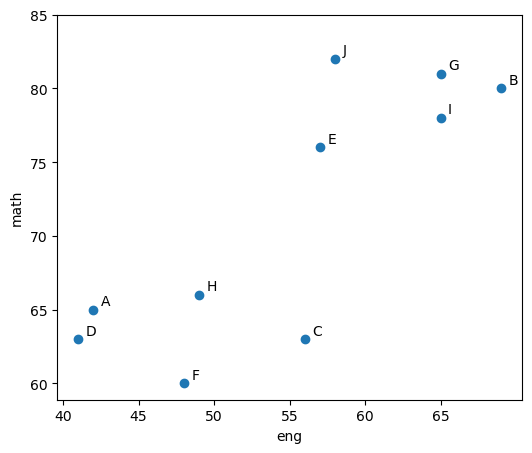

In [112]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)

ax.scatter(eng_scores,math_scores)
ax.set_xlabel('eng')
ax.set_ylabel('math')

name = list('ABCDEFGHIJ')
for i, name in enumerate(name):
    ax.annotate(name , (eng_scores[i]+0.5,math_scores[i]+0.3))

ax.set_xticks(range(40, 70 ,5))
ax.set_yticks(range(60, 90 ,5))

plt.show()

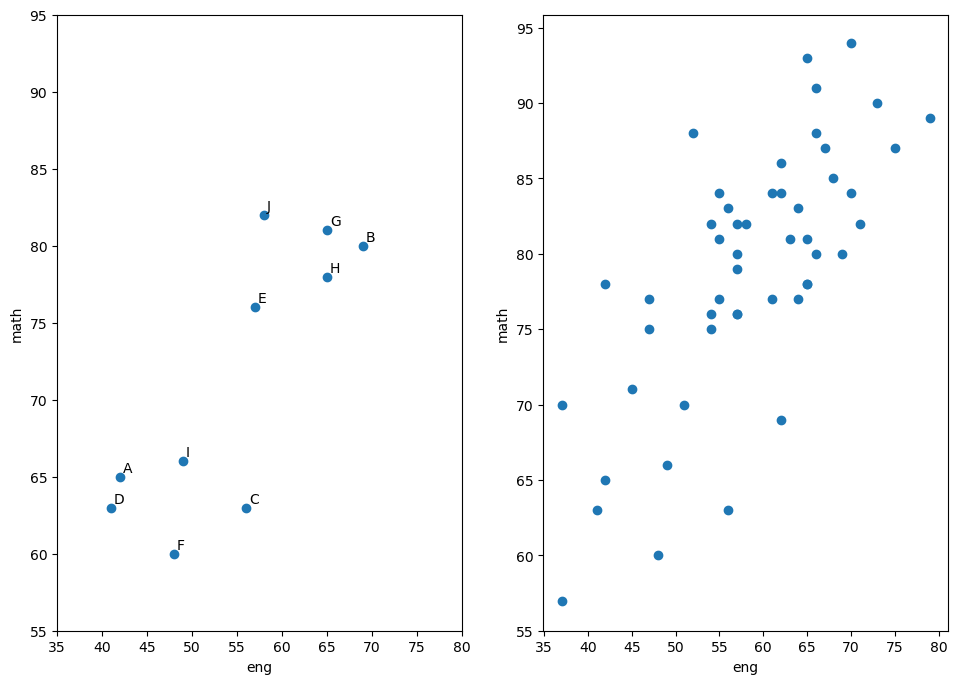

In [113]:
fig = plt.figure(figsize=(11.5,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(eng_scores,math_scores)
ax1.set_xlabel('eng')
ax1.set_ylabel('math')

ax1.set_xticks(range(35,85,5))
ax1.set_yticks(range(55,100,5))

name = list('ABCDEFGIHJ')
for i, name in enumerate(name):
    ax1.annotate(name, (eng_scores[i]+0.3,math_scores[i]+0.3))

ax2.scatter(df['english'],df['mathematics'])
ax2.set_xlabel('eng')
ax2.set_ylabel('math')

ax2.set_xticks(range(35,85,5))
ax2.set_yticks(range(55,100,5))

plt.show()

In [114]:
np.corrcoef(df['english'],df['mathematics'])

array([[1.        , 0.72374149],
       [0.72374149, 1.        ]])

In [115]:
poly_fit = np.polyfit(df['english'],df['mathematics'],1)
poly_fit

array([ 0.62142302, 42.60132433])

In [116]:
xs1 = np.linspace(df['english'].min(),df['english'].max())
poly_fit = np.polyfit(df['english'],df['mathematics'],1)

poly_eng_math = np.poly1d(poly_fit)
ys1 = poly_eng_math(xs1)
ys1

array([65.59397592, 66.12662422, 66.65927252, 67.19192082, 67.72456912,
       68.25721742, 68.78986572, 69.32251401, 69.85516231, 70.38781061,
       70.92045891, 71.45310721, 71.98575551, 72.51840381, 73.05105211,
       73.58370041, 74.11634871, 74.64899701, 75.18164531, 75.71429361,
       76.24694191, 76.77959021, 77.31223851, 77.8448868 , 78.3775351 ,
       78.9101834 , 79.4428317 , 79.97548   , 80.5081283 , 81.0407766 ,
       81.5734249 , 82.1060732 , 82.6387215 , 83.1713698 , 83.7040181 ,
       84.2366664 , 84.7693147 , 85.301963  , 85.8346113 , 86.3672596 ,
       86.89990789, 87.43255619, 87.96520449, 88.49785279, 89.03050109,
       89.56314939, 90.09579769, 90.62844599, 91.16109429, 91.69374259])

In [ ]:
from numpy.polynomial import Polynomial
xs2 = np.linspace(df['english'].min(),df['english'].max())

poly_eng_math = Polynomial.fit(df['english'],df['mathematics'],1)
ys2 = poly_eng_math(xs2)
ys2

array([65.59397592, 66.12662422, 66.65927252, 67.19192082, 67.72456912,
       68.25721742, 68.78986572, 69.32251401, 69.85516231, 70.38781061,
       70.92045891, 71.45310721, 71.98575551, 72.51840381, 73.05105211,
       73.58370041, 74.11634871, 74.64899701, 75.18164531, 75.71429361,
       76.24694191, 76.77959021, 77.31223851, 77.8448868 , 78.3775351 ,
       78.9101834 , 79.4428317 , 79.97548   , 80.5081283 , 81.0407766 ,
       81.5734249 , 82.1060732 , 82.6387215 , 83.1713698 , 83.7040181 ,
       84.2366664 , 84.7693147 , 85.301963  , 85.8346113 , 86.3672596 ,
       86.89990789, 87.43255619, 87.96520449, 88.49785279, 89.03050109,
       89.56314939, 90.09579769, 90.62844599, 91.16109429, 91.69374259])

: 

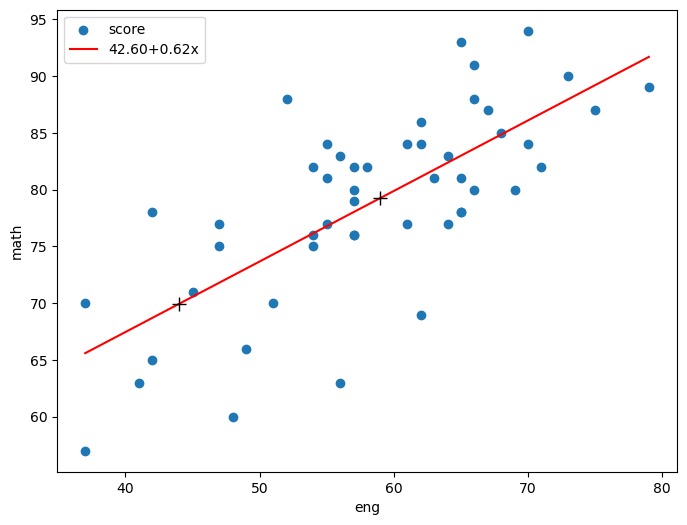

In [118]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['english'], df['mathematics'], label='score')
ax.plot(xs, ys, color='red', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.set_xlabel('eng')
ax.set_ylabel('math')

eng_x = 44
eng_y = 59

math_x = poly_eng_math(eng_x)
math_y = poly_eng_math(eng_y)

ax.plot([eng_x, eng_y], [math_x, math_y], '+k', ms=10)

ax.legend(loc='upper left')

plt.show()
